In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from dotenv import load_dotenv
load_dotenv();

In [4]:
import os
import numpy as np
import pandas as pd

In [5]:
import src.features.build_features as FeaturesManager

In [6]:
seasons_year = [2015, 2016, 2017, 2018]
df = FeaturesManager.build_features(seasons_year)

In [7]:
df['Type']

0         GOAL
1         GOAL
2         GOAL
3         GOAL
4         SHOT
          ... 
305855    SHOT
305856    SHOT
305857    SHOT
305858    SHOT
305859    SHOT
Name: Type, Length: 305860, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305860 entries, 0 to 305859
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Game ID                    305860 non-null  object 
 1   Event Index                305860 non-null  int64  
 2   Period                     305860 non-null  int64  
 3   Team                       305860 non-null  object 
 4   Type                       305860 non-null  object 
 5   Shot Type                  305827 non-null  object 
 6   Shooter                    305860 non-null  object 
 7   Goalie                     305860 non-null  object 
 8   Strength                   28689 non-null   object 
 9   X                          305860 non-null  float64
 10  Y                          305860 non-null  float64
 11  Last event type            305860 non-null  object 
 12  Last event X               302885 non-null  float64
 13  Last event Y               30

In [ ]:
df['Shot distance'].max()

189.6549498431296

In [ ]:
df['Shot distance'].min()

0.0

In [ ]:
df['Shot angle'].max()

180.0

In [ ]:
df['Shot angle'].min()

-161.565051177078

In [ ]:
distance_bins = list(range(0, 195, 5))
angle_bins = list(range(0, 185, 5)) # All but the last (righthand-most) bin is half-open in Numpy

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0.5, 1.0, 'Goals')

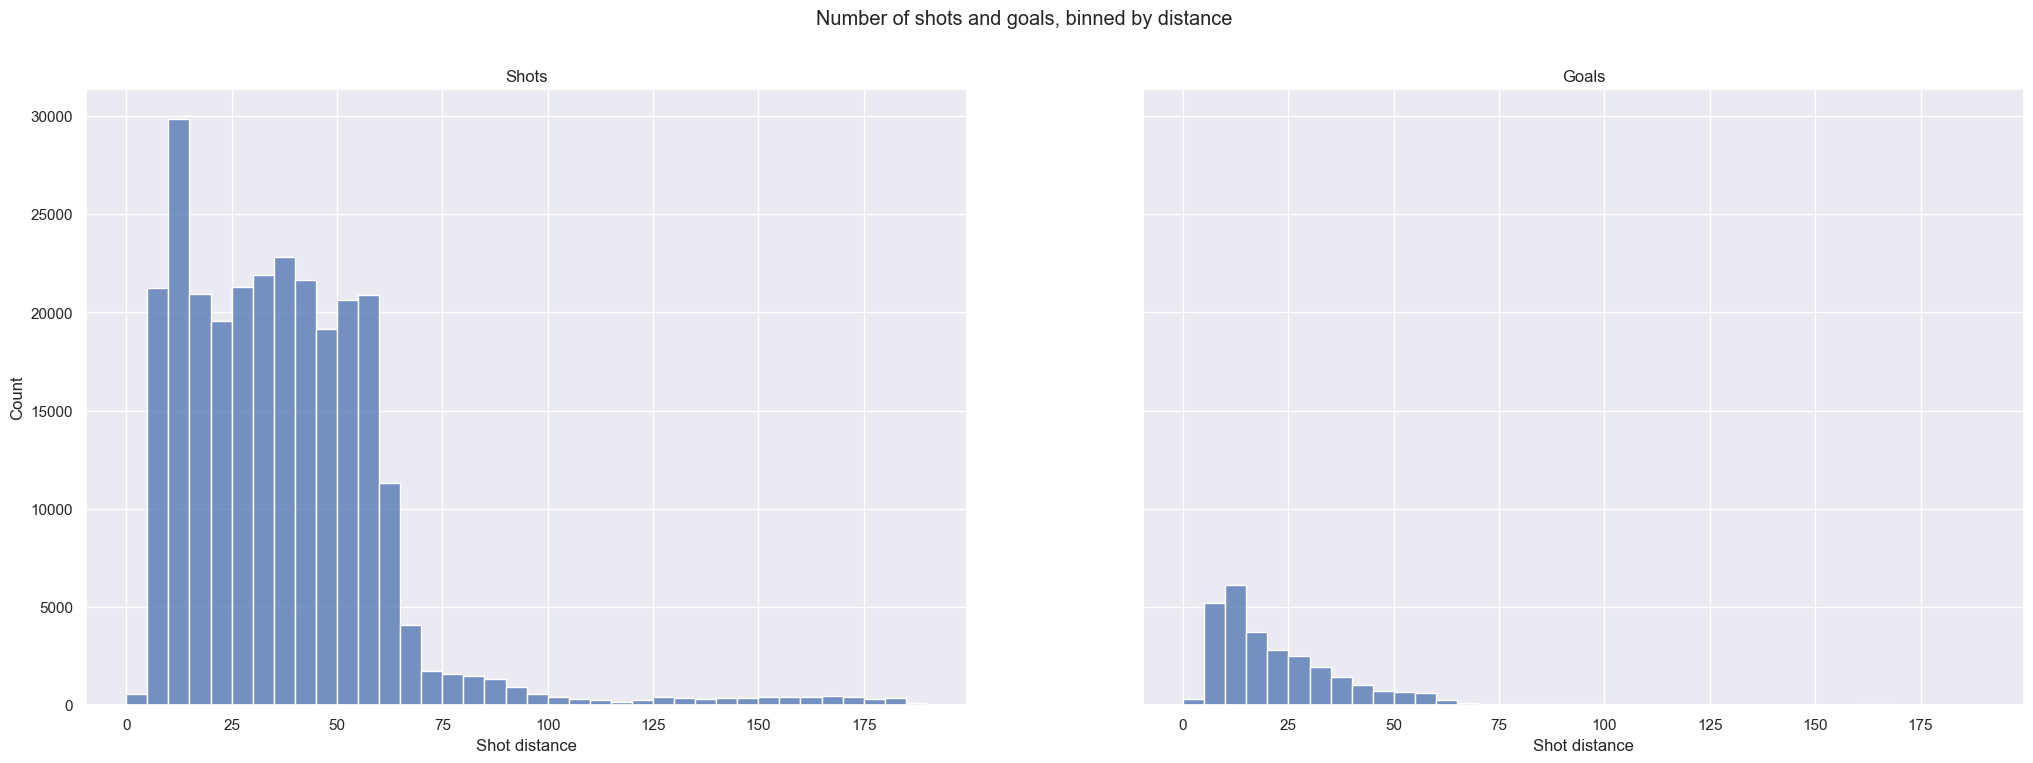

In [ ]:
# Q1 - Hist1
fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Number of shots and goals, binned by distance')

sns.histplot(ax=axes[0], data=df, x=df[df['Is Goal'] == 0]["Shot distance"], bins=distance_bins)
axes[0].set_title('Shots')

sns.histplot(ax=axes[1], data=df, x=df[df['Is Goal'] == 1]["Shot distance"], bins=distance_bins)
axes[1].set_title('Goals')

Text(0.5, 1.0, 'Goals')

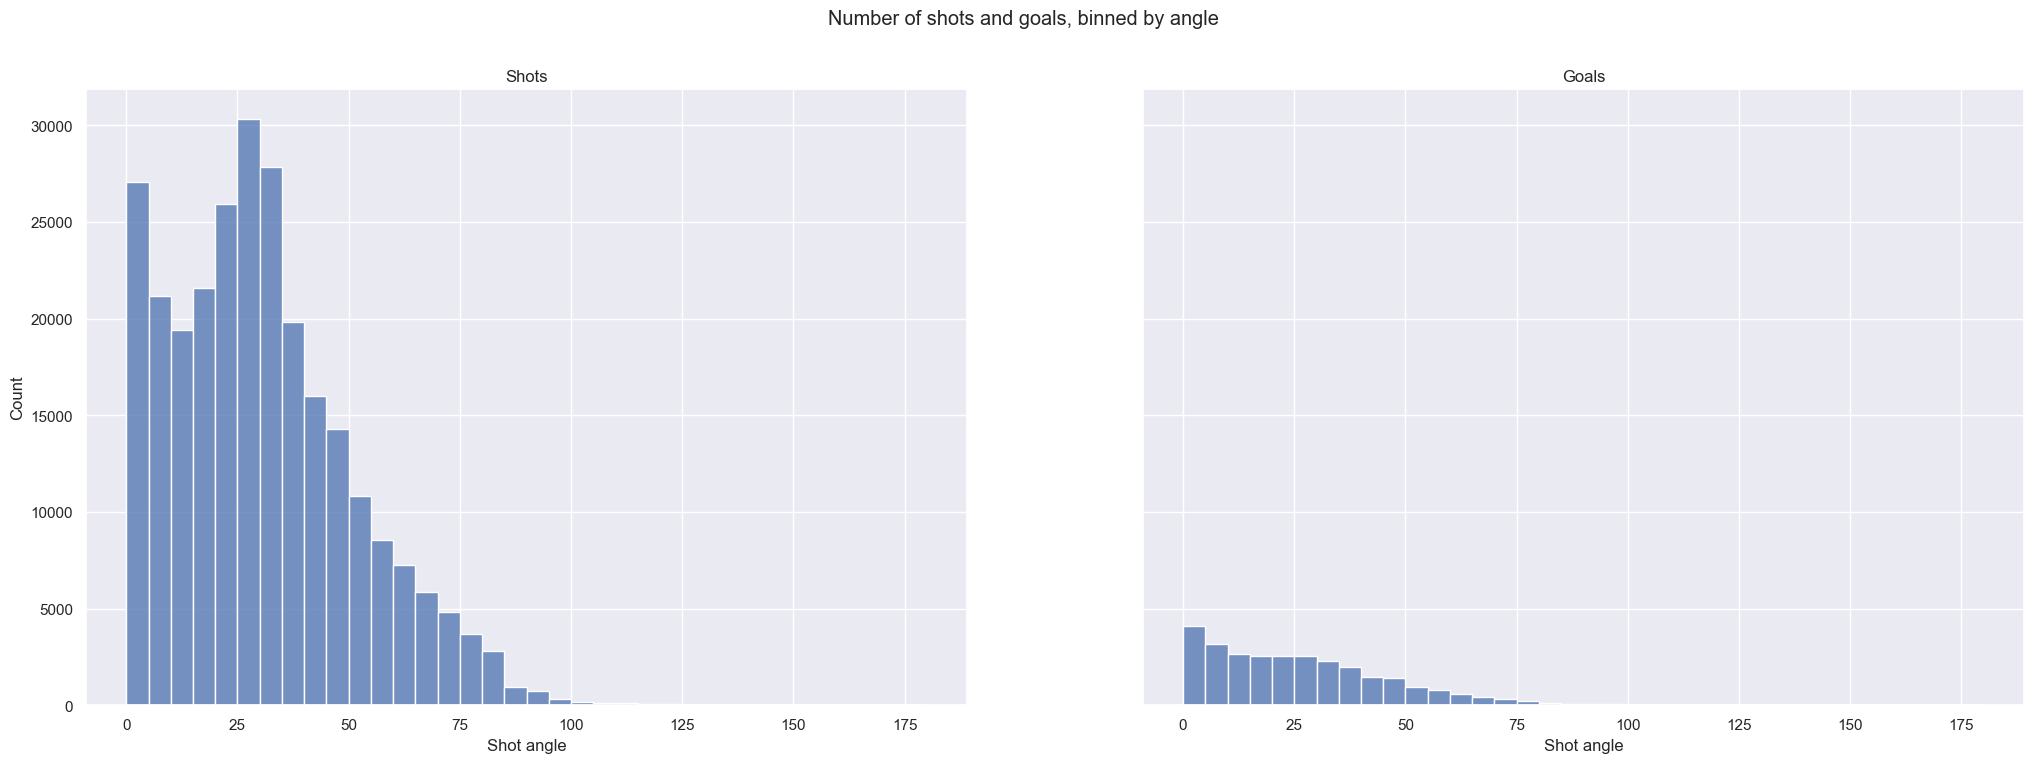

In [ ]:
# Q1 - Hist2
fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Number of shots and goals, binned by angle')

sns.histplot(ax=axes[0], data=df, x=df[df['Is Goal'] == 0]["Shot angle"].abs(), bins=angle_bins)
axes[0].set_title('Shots')

sns.histplot(ax=axes[1], data=df, x=df[df['Is Goal'] == 1]["Shot angle"].abs(), bins=angle_bins)
axes[1].set_title('Goals')

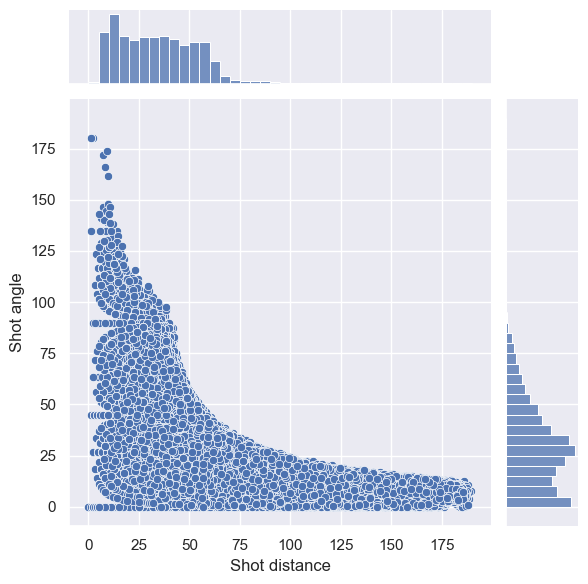

In [ ]:
# Q1 - Hist3
sns.jointplot(data=df, x=df["Shot distance"], y=df["Shot angle"].abs(), marginal_kws=dict(bins=distance_bins)) # I took the absolute value

In [ ]:
# Q2
distance_bins_2 = list(range(0, 195, 10))
angle_bins_2 = list(range(0, 185, 10))
df['Angle Bins'] = pd.cut(df['Shot angle'].abs(), bins=angle_bins_2, include_lowest=True)
df['Distance Bins'] = pd.cut(df['Shot distance'], bins=distance_bins_2, include_lowest=True)

In [ ]:
df_angle = pd.pivot_table(df, values='Is Goal', index='Angle Bins', columns='Type',  aggfunc='count').reset_index()
df_angle.columns.name=None
df_angle

,Angle Bins,GOAL,SHOT
0,"(-0.001, 10.0]",7276,48258
1,"(10.0, 20.0]",5185,40993
2,"(20.0, 30.0]",5104,56300
3,"(30.0, 40.0]",4262,47679
4,"(40.0, 50.0]",2852,30274
5,"(50.0, 60.0]",1715,19372
6,"(60.0, 70.0]",986,13125
7,"(70.0, 80.0]",526,8491
8,"(80.0, 90.0]",211,4270
9,"(90.0, 100.0]",59,538


In [ ]:
df_distance = pd.pivot_table(df, values='Is Goal', index='Distance Bins', columns='Type',  aggfunc='count').reset_index()
df_distance.columns.name=None
df_distance

,Distance Bins,GOAL,SHOT
0,"(-0.001, 10.0]",5796,23137
1,"(10.0, 20.0]",9658,49958
2,"(20.0, 30.0]",5276,40669
3,"(30.0, 40.0]",3364,44690
4,"(40.0, 50.0]",1751,40823
5,"(50.0, 60.0]",1303,41347
6,"(60.0, 70.0]",390,15327
7,"(70.0, 80.0]",95,3360
8,"(80.0, 90.0]",90,2791
9,"(90.0, 100.0]",85,1521


In [ ]:
def calculate_percentage(a, b):
    try:
        result = (a/(a+b))*100
    except:
        result = np.nan
    return result

In [ ]:
df_angle['Goal Percentage'] = df_angle.apply(lambda row : calculate_percentage(row['GOAL'], row['SHOT']), axis=1)
df_distance['Goal Percentage'] = df_distance.apply(lambda row : calculate_percentage(row['GOAL'], row['SHOT']), axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '(-0.001, 10.0]'),
  Text(1, 0, '(10.0, 20.0]'),
  Text(2, 0, '(20.0, 30.0]'),
  Text(3, 0, '(30.0, 40.0]'),
  Text(4, 0, '(40.0, 50.0]'),
  Text(5, 0, '(50.0, 60.0]'),
  Text(6, 0, '(60.0, 70.0]'),
  Text(7, 0, '(70.0, 80.0]'),
  Text(8, 0, '(80.0, 90.0]'),
  Text(9, 0, '(90.0, 100.0]'),
  Text(10, 0, '(100.0, 110.0]'),
  Text(11, 0, '(110.0, 120.0]'),
  Text(12, 0, '(120.0, 130.0]'),
  Text(13, 0, '(130.0, 140.0]'),
  Text(14, 0, '(140.0, 150.0]'),
  Text(15, 0, '(150.0, 160.0]'),
  Text(16, 0, '(160.0, 170.0]'),
  Text(17, 0, '(170.0, 180.0]'),
  Text(18, 0, '(180.0, 190.0]')])

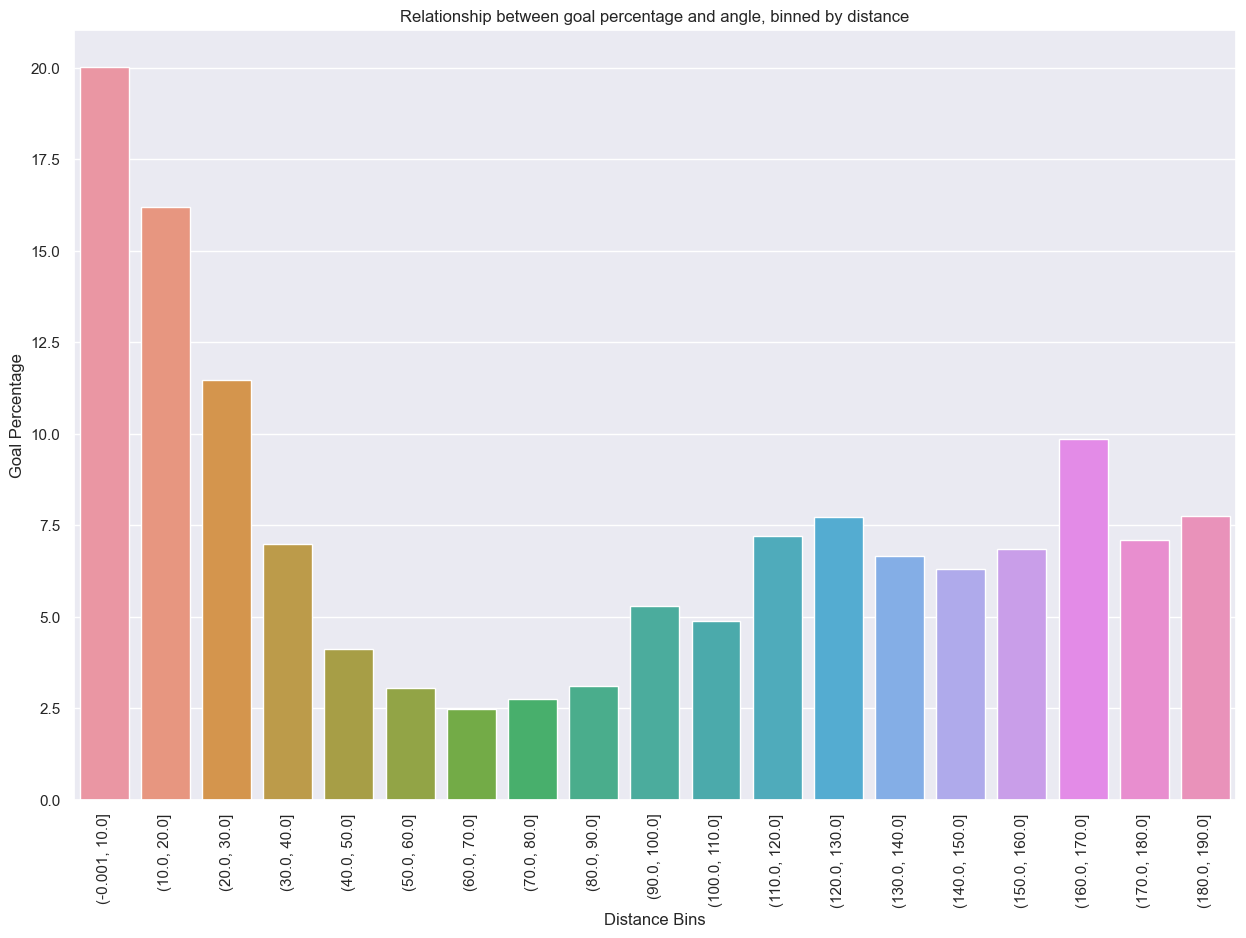

In [ ]:
# Q2 - Hist1
plt.figure(figsize=(15, 10))
sns.barplot(data=df_distance, x="Distance Bins", y="Goal Percentage").set_title('Relationship between goal percentage and angle, binned by distance')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '(-0.001, 10.0]'),
  Text(1, 0, '(10.0, 20.0]'),
  Text(2, 0, '(20.0, 30.0]'),
  Text(3, 0, '(30.0, 40.0]'),
  Text(4, 0, '(40.0, 50.0]'),
  Text(5, 0, '(50.0, 60.0]'),
  Text(6, 0, '(60.0, 70.0]'),
  Text(7, 0, '(70.0, 80.0]'),
  Text(8, 0, '(80.0, 90.0]'),
  Text(9, 0, '(90.0, 100.0]'),
  Text(10, 0, '(100.0, 110.0]'),
  Text(11, 0, '(110.0, 120.0]'),
  Text(12, 0, '(120.0, 130.0]'),
  Text(13, 0, '(130.0, 140.0]'),
  Text(14, 0, '(140.0, 150.0]'),
  Text(15, 0, '(150.0, 160.0]'),
  Text(16, 0, '(160.0, 170.0]'),
  Text(17, 0, '(170.0, 180.0]')])

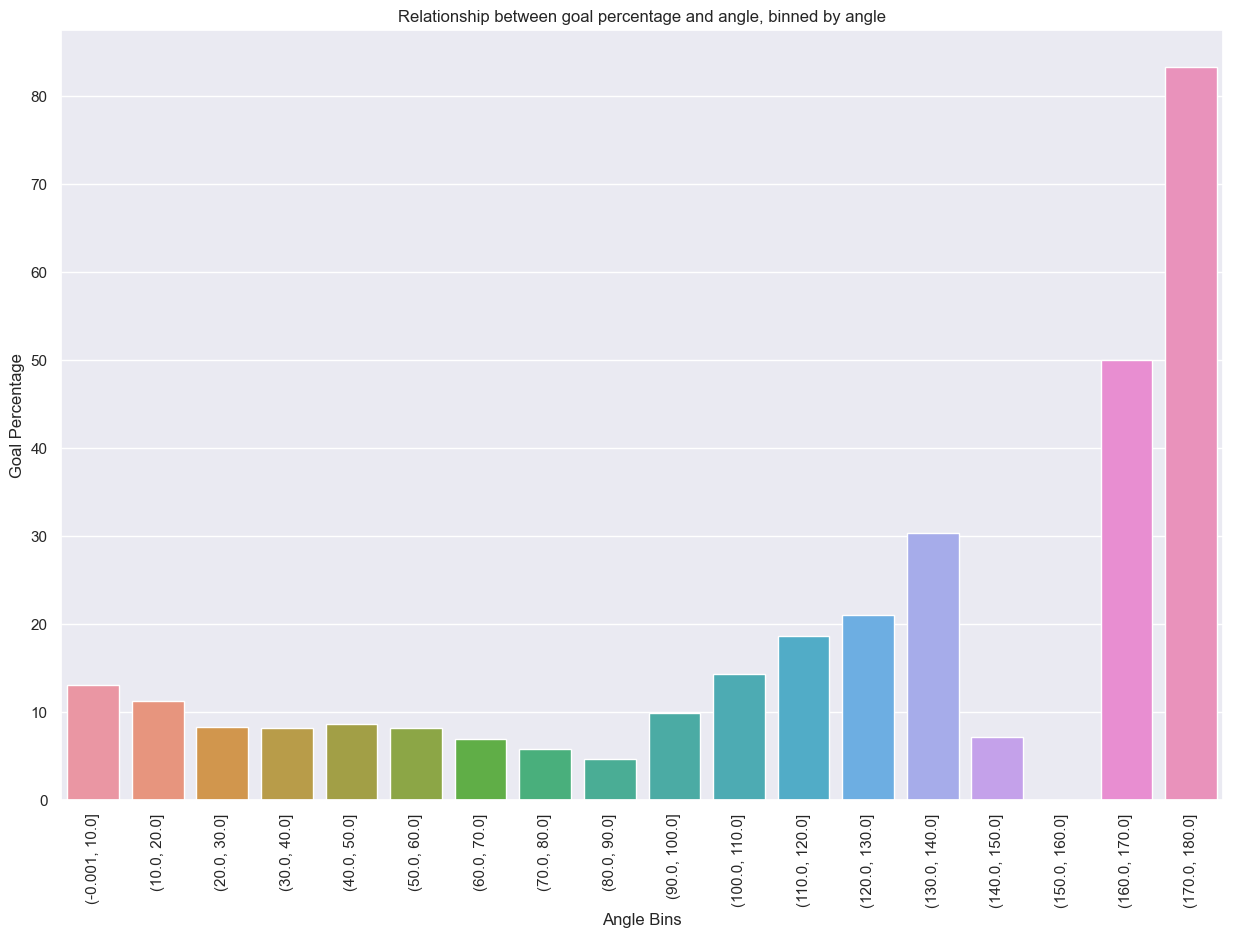

In [ ]:
# Q2 - Hist2
plt.figure(figsize=(15, 10))
sns.barplot(data=df_angle, x="Angle Bins", y="Goal Percentage").set_title('Relationship between goal percentage and angle, binned by angle')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Empty Net')

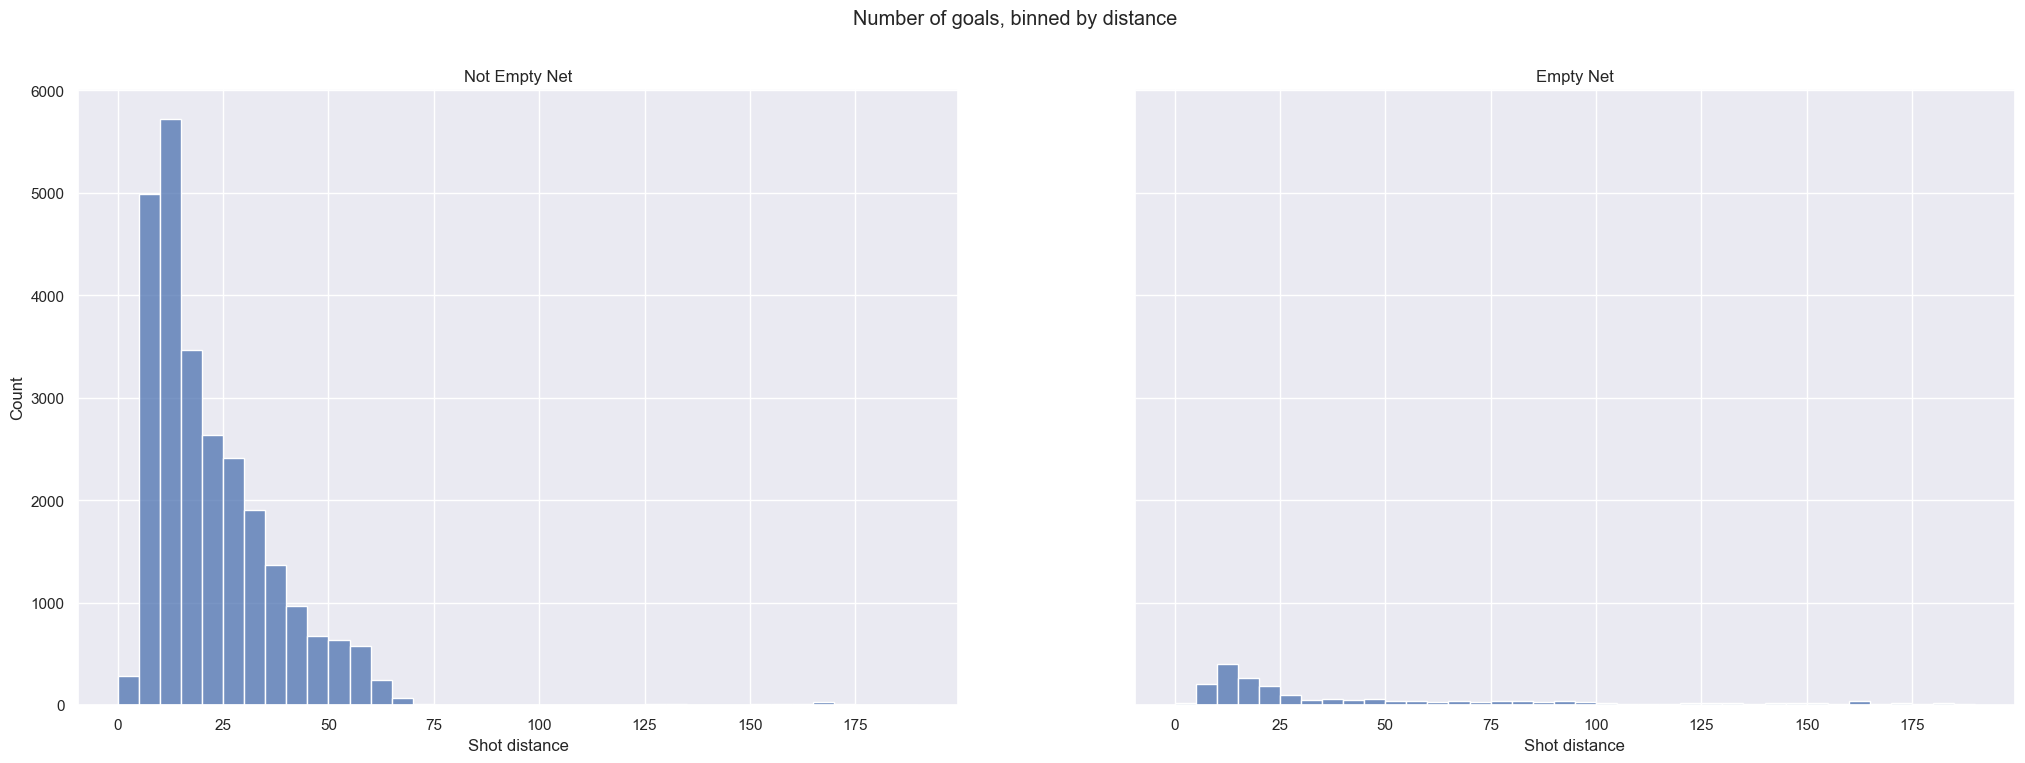

In [ ]:
# Q3
df_goals = df[df['Is Goal'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Number of goals, binned by distance')

sns.histplot(ax=axes[0], data=df_goals, x=df_goals[df_goals['Is Empty'] == 0]["Shot distance"], bins=distance_bins)
axes[0].set_title('Not Empty Net')

sns.histplot(ax=axes[1], data=df_goals, x=df_goals[df_goals['Is Empty'] == 1]["Shot distance"], bins=distance_bins)
axes[1].set_title('Empty Net')

In [ ]:
# Check for goal in defensive net without empty net
cas_bizarres = df_goals[(df_goals['Is Empty'] == 0) & (df_goals['st_X'] < -25)]

In [ ]:
cas_bizarres

,Game ID,Event Index,Period,Team,Type,Shot Type,Shooter,Goalie,Strength,X,...,Shot angle,Is Goal,Is Empty,Game seconds,Last event angle,Rebound,Change in Shot Angle,Speed From Previous Event,Angle Bins,Distance Bins
1764,2016020030,241,3,New York Islanders (NYI),GOAL,Wrist Shot,John Tavares,John Gibson,Even,-33.0,...,-9.766679,1,0,2879,-30.963757,True,21.197077,inf,"(-0.001, 10.0]","(120.0, 130.0]"
4562,2016020077,145,2,Edmonton Oilers (EDM),GOAL,Snap Shot,Mark Letestu,Connor Hellebuyck,Short Handed,76.0,...,0.694460,1,0,1764,-6.072456,False,0.000000,19.701241,"(-0.001, 10.0]","(160.0, 170.0]"
4563,2016020077,154,2,Edmonton Oilers (EDM),GOAL,Snap Shot,Darnell Nurse,Connor Hellebuyck,Even,79.0,...,2.726311,1,0,1870,-21.104839,False,0.000000,28.745652,"(-0.001, 10.0]","(160.0, 170.0]"
4564,2016020077,187,2,Edmonton Oilers (EDM),GOAL,Snap Shot,Zack Kassian,Connor Hellebuyck,Even,73.0,...,5.640549,1,0,2236,-0.374477,False,0.000000,9.617692,"(-0.001, 10.0]","(160.0, 170.0]"
20724,2016020342,126,2,New York Islanders (NYI),GOAL,Tip-In,Jason Chimera,Matt Murray,Even,37.0,...,-7.236922,1,0,1330,0.000000,True,7.236922,110.168053,"(-0.001, 10.0]","(120.0, 130.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287166,2019020902,201,2,Colorado Avalanche (COL),GOAL,Wrist Shot,Samuel Girard,Jonathan Quick,Even,-52.0,...,4.460848,1,0,2358,1.478273,False,0.000000,15.652476,"(-0.001, 10.0]","(140.0, 150.0]"
287167,2019020902,292,3,Los Angeles Kings (LAK),GOAL,Wrist Shot,Tyler Toffoli,Pavel Francouz,Even,-62.0,...,-0.758840,1,0,3545,-7.926927,False,0.000000,4.237924,"(-0.001, 10.0]","(150.0, 160.0]"
292395,2019020989,35,1,Minnesota Wild (MIN),GOAL,Wrist Shot,Ryan Donato,Jimmy Howard,Even,-76.0,...,-1.041627,1,0,499,-18.434949,True,17.393322,inf,"(-0.001, 10.0]","(160.0, 170.0]"
293050,2019021001,176,2,Los Angeles Kings (LAK),GOAL,Wrist Shot,Dustin Brown,Mackenzie Blackwood,Even,-77.0,...,1.725255,1,0,1994,-14.908258,False,0.000000,11.884864,"(-0.001, 10.0]","(160.0, 170.0]"


In [ ]:
contain_values = cas_bizarres[cas_bizarres['Game ID'].str.contains('2018')]
print (contain_values)

           Game ID  Event Index  Period                         Team  Type  \
164898  2018020175           64       1        Arizona Coyotes (ARI)  GOAL   
165994  2018020192           59       1          Winnipeg Jets (WPG)  GOAL   
165995  2018020192           89       1       Florida Panthers (FLA)  GOAL   
165996  2018020192          104       1          Winnipeg Jets (WPG)  GOAL   
165997  2018020192          146       2       Florida Panthers (FLA)  GOAL   
165998  2018020192          210       2       Florida Panthers (FLA)  GOAL   
165999  2018020192          287       3       Florida Panthers (FLA)  GOAL   
171339  2018020278           21       1      New Jersey Devils (NJD)  GOAL   
178184  2018020388           10       1        Edmonton Oilers (EDM)  GOAL   
179021  2018020401          139       2  Columbus Blue Jackets (CBJ)  GOAL   
179022  2018020401          149       2  Columbus Blue Jackets (CBJ)  GOAL   
179023  2018020401          167       2     New York Islanders (

In [ ]:
match_2018020192 = contain_values.loc[contain_values['Game ID'] == '2018020192']
match_2018020192

,Game ID,Event Index,Period,Team,Type,Shot Type,Shooter,Goalie,Strength,X,...,Shot angle,Is Goal,Is Empty,Game seconds,Last event angle,Rebound,Change in Shot Angle,Speed From Previous Event,Angle Bins,Distance Bins
165994,2018020192,59,1,Winnipeg Jets (WPG),GOAL,Snap Shot,Nikolaj Ehlers,Roberto Luongo,Even,81.0,...,-1.684684,1,0,533,0.686144,True,2.370829,3.807887,"(-0.001, 10.0]","(170.0, 180.0]"
165995,2018020192,89,1,Florida Panthers (FLA),GOAL,Deflected,Evgenii Dadonov,Connor Hellebuyck,Power Play,-76.0,...,0.694460,1,0,869,-0.454719,True,1.149179,4.346135,"(-0.001, 10.0]","(160.0, 170.0]"
165996,2018020192,104,1,Winnipeg Jets (WPG),GOAL,Wrist Shot,Patrik Laine,Roberto Luongo,Power Play,69.0,...,8.637131,1,0,1036,7.926927,False,0.000000,0.050000,"(-0.001, 10.0]","(150.0, 160.0]"
165997,2018020192,146,2,Florida Panthers (FLA),GOAL,Wrist Shot,Mike Hoffman,Connor Hellebuyck,Power Play,58.0,...,8.130102,1,0,1499,47.726311,False,0.000000,5.291831,"(-0.001, 10.0]","(140.0, 150.0]"
165998,2018020192,210,2,Florida Panthers (FLA),GOAL,Slap Shot,Keith Yandle,Connor Hellebuyck,Power Play,41.0,...,2.642545,1,0,2374,-7.926927,False,0.000000,2.639865,"(-0.001, 10.0]","(130.0, 140.0]"
165999,2018020192,287,3,Florida Panthers (FLA),GOAL,Slap Shot,Frank Vatrano,Connor Hellebuyck,Even,-58.0,...,0.779486,1,0,3135,47.726311,False,0.000000,11.687742,"(-0.001, 10.0]","(140.0, 150.0]"


In [33]:
match_2018020192['st_X']

165994   -81.0
165995   -76.0
165996   -69.0
165997   -58.0
165998   -41.0
165999   -58.0
Name: st_X, dtype: float64

In [34]:
match_2018020192['X']

165994    81.0
165995   -76.0
165996    69.0
165997    58.0
165998    41.0
165999   -58.0
Name: X, dtype: float64

# Modèles

In [8]:
# DO NOT MODIFY!
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
device = "cuda" if torch.cuda.is_available() else "cpu"

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [10]:
from tqdm import tqdm

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305860 entries, 0 to 305859
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Game ID                    305860 non-null  object 
 1   Event Index                305860 non-null  int64  
 2   Period                     305860 non-null  int64  
 3   Team                       305860 non-null  object 
 4   Type                       305860 non-null  object 
 5   Shot Type                  305827 non-null  object 
 6   Shooter                    305860 non-null  object 
 7   Goalie                     305860 non-null  object 
 8   Strength                   28689 non-null   object 
 9   X                          305860 non-null  float64
 10  Y                          305860 non-null  float64
 11  Last event type            305860 non-null  object 
 12  Last event X               302885 non-null  float64
 13  Last event Y               30

In [12]:
columns_erase =['Game ID', 'Event Index', 'st_X','st_Y','Last event st_X','Last event st_Y',
                'Strength','Last event angle','Change in Shot Angle','Speed From Previous Event','Team','Shooter',
               'Goalie','Type','Shot Type','Last event type']
df.drop(columns_erase, axis=1, inplace=True)

In [13]:
df2=df.dropna().reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302885 entries, 0 to 302884
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Period                   302885 non-null  int64  
 1   X                        302885 non-null  float64
 2   Y                        302885 non-null  float64
 3   Last event X             302885 non-null  float64
 4   Last event Y             302885 non-null  float64
 5   Last event elapsed time  302885 non-null  int64  
 6   Last event distance      302885 non-null  float64
 7   Shot distance            302885 non-null  float64
 8   Shot angle               302885 non-null  float64
 9   Is Goal                  302885 non-null  int64  
 10  Is Empty                 302885 non-null  int64  
 11  Game seconds             302885 non-null  int64  
 12  Rebound                  302885 non-null  bool   
dtypes: bool(1), float64(7), int64(5)
memory usage: 28.0 MB


In [14]:
X,y = df2.drop(['Is Goal'], axis = 1), df2['Is Goal']

In [15]:
X.shape

(302885, 12)

In [16]:
y.shape

(302885,)

In [17]:
X= torch.Tensor(list(X.values)).to(device)
y = torch.tensor(list(y.values), dtype=torch.int64, device=device)

In [18]:
X.shape

torch.Size([302885, 12])

In [19]:
y.shape

torch.Size([302885])

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [26]:
y_train = y_train.reshape((y_train.size(0),1))
y_val = y_val.reshape((y_val.size(0),1))

In [161]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(12, 32),
        nn.ReLU(),
        nn.Linear(32, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16,2),
        nn.Softmax()
    )


    def forward(self, x):
        return self.layers(x)

In [162]:
def train_loop(epoch, model, train_data,train_label ,criterion, optimizer):
    train_loss = 0.
    for i,data in enumerate(train_data):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output.reshape((1,output.size(0))),train_label[i])
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss = train_loss / len(train_data)

    print(f"Epoch: {epoch} | Val Loss: {train_loss:.6f}")

    return train_loss

def valid_loop(epoch, model, val_train, val_label, criterion):
    val_loss = 0.  
    model.eval()
    for i, data in enumerate(val_train):
        # forward + backward + optimize
        output = model(data)
        loss = criterion(output, val_label[i])
        val_loss += loss.item()
    val_loss = val_loss / len(val_loader)

    print(f"Epoch: {epoch} | Val Loss: {val_loss:.6f}")
    return val_loss

In [163]:
train_losses,val_losses = [], []
n_epochs = 1

model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

for epoch in tqdm(range(n_epochs)):
    # Training
    train_loss = train_loop(epoch, model, X_train,y_train, criterion, optimizer)
    train_losses.append(train_loss)

    # Validation
    val_loss = valid_loop(epoch, model, X_val,y_val, criterion)
    val_losses.append(val_loss)

  0%|          | 0/25 [00:07<?, ?it/s]


KeyboardInterrupt: 